# Lifetime vs. Difference in Semimajor Axis plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

### files with shorter run time

In [2]:
path = '/Users/mariahjones/Desktop/research/projects/orbitals/short/'

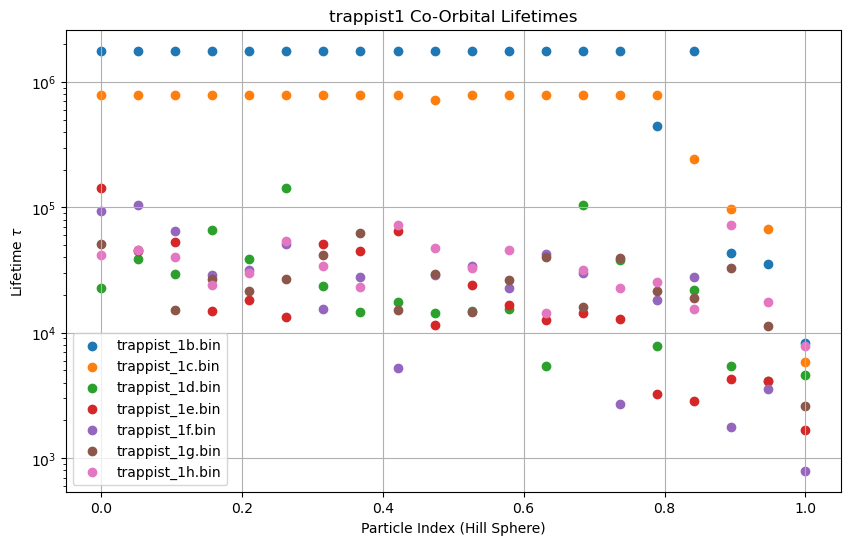

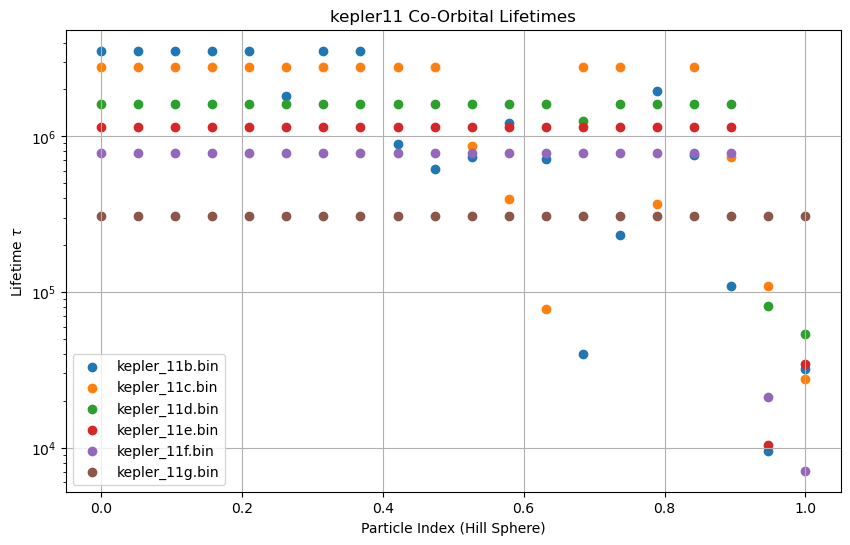

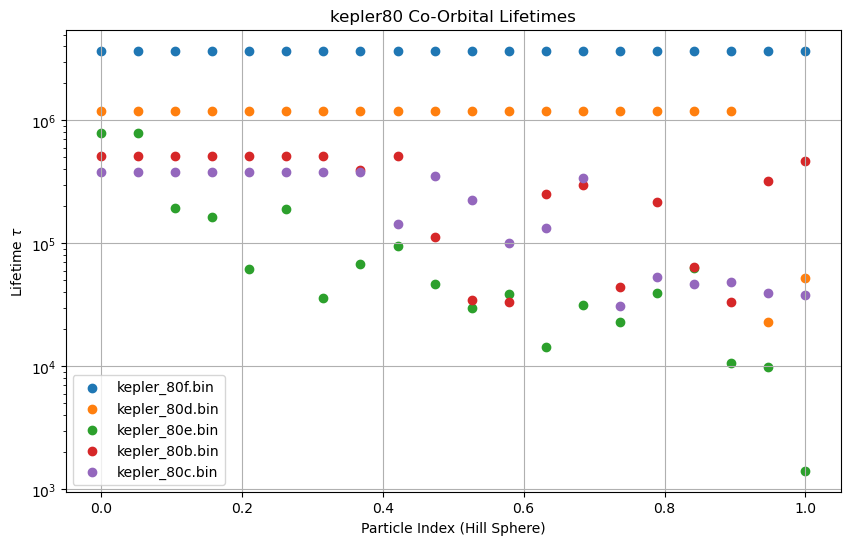

/Users/mariahjones/anaconda3/lib/python3.11/site-packages/rebound/simulationarchive.py:95: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/mariahjones/anaconda3/lib/python3.11/site-packages/rebound/simulationarchive.py:142: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


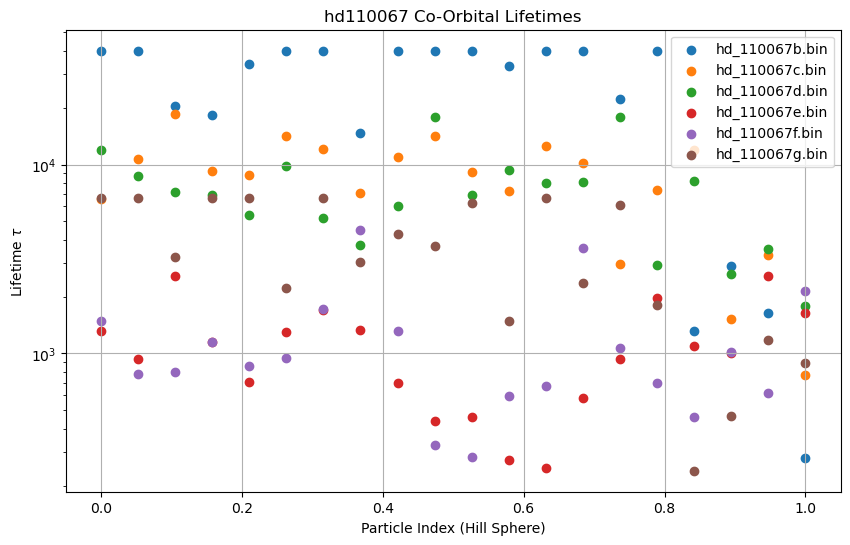

In [3]:
# filenames
systems = {
    "trappist1": ["trappist_1b.bin", "trappist_1c.bin", "trappist_1d.bin", "trappist_1e.bin", "trappist_1f.bin", "trappist_1g.bin", "trappist_1h.bin"],
    "kepler11": ["kepler_11b.bin", "kepler_11c.bin", "kepler_11d.bin", "kepler_11e.bin", "kepler_11f.bin", "kepler_11g.bin"],
    "kepler80": ["kepler_80f.bin", "kepler_80d.bin", "kepler_80e.bin", "kepler_80b.bin", "kepler_80c.bin"],
    "hd110067": ["hd_110067b.bin", "hd_110067c.bin", "hd_110067d.bin", "hd_110067e.bin", "hd_110067f.bin", "hd_110067g.bin"]
}

for system_name, filenames in systems.items():
    plt.figure(figsize=(10, 6))  # new figure for each system

    for index, filename in enumerate(filenames):
        sa = rebound.Simulationarchive(path + filename)

        tmax = sa.tmax
        tmin = sa.tmin
        nshots = len(sa)
        times = np.linspace(tmin, tmax, nshots)

        # initialize lists
        fractional_indices = []
        normalized_stability_times = []

        # load first snapshot to get initial properties
        sim = sa[0]
        star_mass = sim.particles[0].m
        N_active = sim.N_active
        N_total = sim.N

        # determine planet of interest based on index
        planet = sim.particles[index + 1]
        a_planet = planet.a

        # Hill radius (AU)
        hill_radius = (planet.m / (3 * star_mass))**(1/3)
        stability_threshold = 5 * hill_radius

        # orbital period of host planet
        planet_period = 2 * np.pi * np.sqrt(a_planet**3 / (star_mass))

        # track stability times for each coorbital
        for j in range(N_active, N_total):
            coorbital = sim.particles[j]

            # fractional index
            fractional_index = (j - N_active) / (N_total - N_active - 1)

            # track stability times
            stability_detected = False
            for k in range(nshots):
                sim = sa[k]
                planet_longitude = sim.particles[index + 1].l
                coorbital_longitude = sim.particles[j].l

                # difference in mean_lon
                difference = abs(coorbital_longitude - planet_longitude)
                difference = min(difference, 2*np.pi - difference)  # account for periodicity

                # check stability threshold
                if difference < stability_threshold:
                    stability_time = times[k]
                    normalized_tau = stability_time / planet_period
                    fractional_indices.append(fractional_index)
                    normalized_stability_times.append(normalized_tau)
                    stability_detected = True
                    break  # stop if instability is detected

            if not stability_detected:
                # assume stability till the end
                normalized_tau = tmax / planet_period
                fractional_indices.append(fractional_index)
                normalized_stability_times.append(normalized_tau)

        # extract results for plotting
        if normalized_stability_times and fractional_indices:
            plt.scatter(fractional_indices, normalized_stability_times, label=filename)

    plt.xlabel('Particle Index (Hill Sphere)')  
    plt.ylabel(r'Lifetime $\tau$')  
    plt.title(f'{system_name} Co-Orbital Lifetimes')  
    plt.yscale('log')  
    plt.grid(True)
    plt.legend()
    plt.savefig(f'{system_name}_lifetime_short.png')
    plt.show()

#### kepler-90 sims

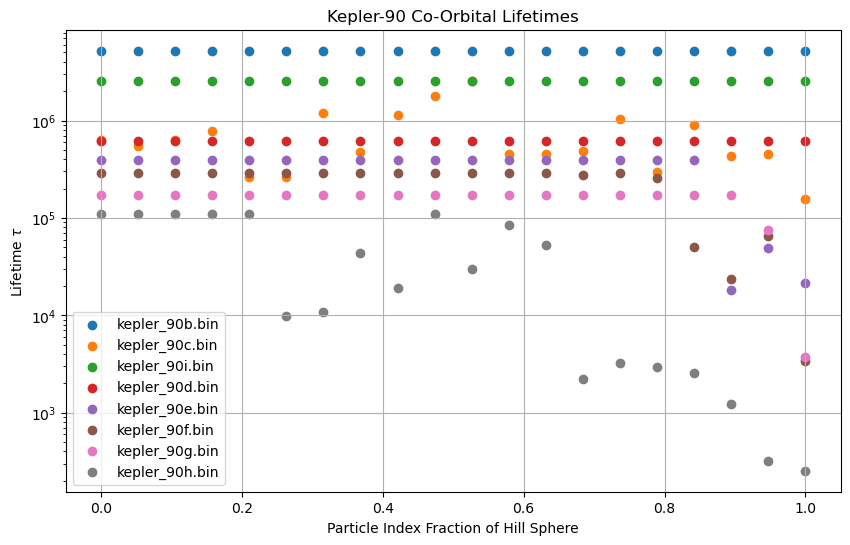

In [4]:
kepler90_filenames = ["kepler_90b.bin", "kepler_90c.bin", "kepler_90i.bin", "kepler_90d.bin", "kepler_90e.bin", "kepler_90f.bin", "kepler_90g.bin", "kepler_90h.bin"]

plt.figure(figsize=(10, 6))  # Create a new figure for the Kepler-90 system

# Process each file in the Kepler-90 system
for filename in kepler90_filenames:
    # Load the simulation archive
    sa = rebound.Simulationarchive(path + filename)

    # Get the time range and number of snapshots
    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)
    times = np.linspace(tmin, tmax, nshots)

    # Initialize lists for the system
    fractional_indices = []
    normalized_stability_times = []

    # Load the first snapshot to get initial properties of the system
    sim = sa[0]
    star_mass = sim.particles[0].m
    N_active = sim.N_active
    N_total = sim.N

    # Determine the planet of interest and its coorbitals based on the filename
    if "kepler_90b" in filename:
        planet_index = 1
        coorbital_start_index = 2
    elif "kepler_90c" in filename:
        planet_index = 2
        coorbital_start_index = 3
    elif "kepler_90i" in filename:
        planet_index = 3
        coorbital_start_index = 4
    elif "kepler_90d" in filename:
        planet_index = 4
        coorbital_start_index = 5
    elif "kepler_90e" in filename:
        planet_index = 5
        coorbital_start_index = 6
    elif "kepler_90f" in filename:
        planet_index = 6
        coorbital_start_index = 7
    elif "kepler_90g" in filename:
        planet_index = 7
        coorbital_start_index = 8
    elif "kepler_90h" in filename:
        planet_index = 8
        coorbital_start_index = 9

    planet = sim.particles[planet_index]
    a_planet = planet.a

    # Calculate Hill radius in AU
    hill_radius = (planet.m / (3 * star_mass))**(1/3)
    stability_threshold = 5 * hill_radius

    # Calculate the orbital period of the host planet
    planet_period = 2 * np.pi * np.sqrt(a_planet**3 / (star_mass))

    # Track stability times for each coorbital
    for j in range(coorbital_start_index, coorbital_start_index + 20):
        coorbital = sim.particles[j]

        # Compute the fractional index for the particle
        fractional_index = (j - coorbital_start_index) / 19

        # Track stability times
        stability_detected = False
        for k in range(nshots):
            sim = sa[k]
            planet_longitude = sim.particles[planet_index].l
            coorbital_longitude = sim.particles[j].l

            # Compute the difference as coorbital minus planet
            difference = abs(coorbital_longitude - planet_longitude)
            difference = min(difference, 2*np.pi - difference)  # Account for periodicity

            # Check if the difference is below the stability threshold
            if difference < stability_threshold:
                stability_time = times[k]
                normalized_tau = stability_time / planet_period
                fractional_indices.append(fractional_index)
                normalized_stability_times.append(normalized_tau)
                stability_detected = True
                break  # Stop if instability is detected

        if not stability_detected:
            # If no instability is detected, assume stability till the end
            normalized_tau = tmax / planet_period
            fractional_indices.append(fractional_index)
            normalized_stability_times.append(normalized_tau)

    # Extract results for plotting
    if normalized_stability_times and fractional_indices:
        # Plot the fractional index vs. normalized stability time (τ)
        plt.scatter(fractional_indices, normalized_stability_times, label=filename)

plt.xlabel('Particle Index Fraction of Hill Sphere')  # Updated x-axis label
plt.ylabel(r'Lifetime $\tau$')  # Updated y-axis label
plt.title('Kepler-90 Co-Orbital Lifetimes')  # Updated title
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.legend()
plt.savefig('kepler90_lifetime_short.png')
plt.show()

### files with longer run time

In [5]:
path = '/Users/mariahjones/Desktop/research/projects/orbitals/long/'

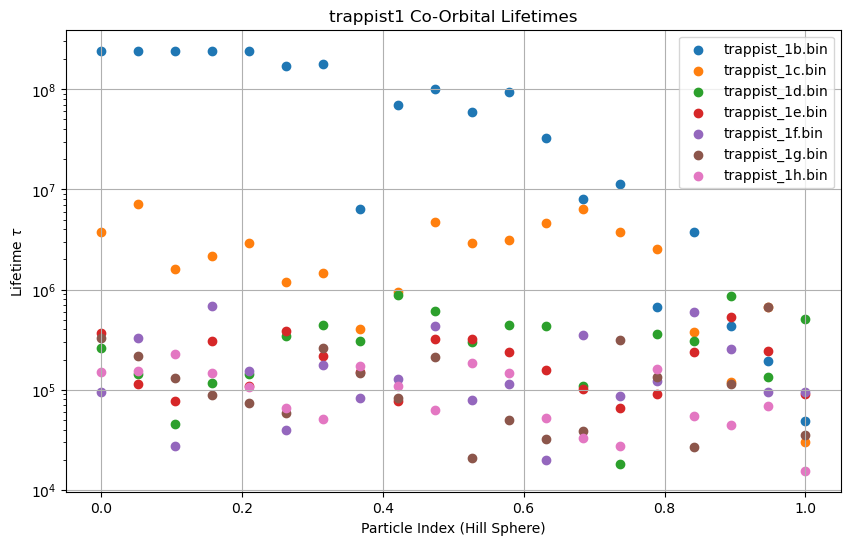

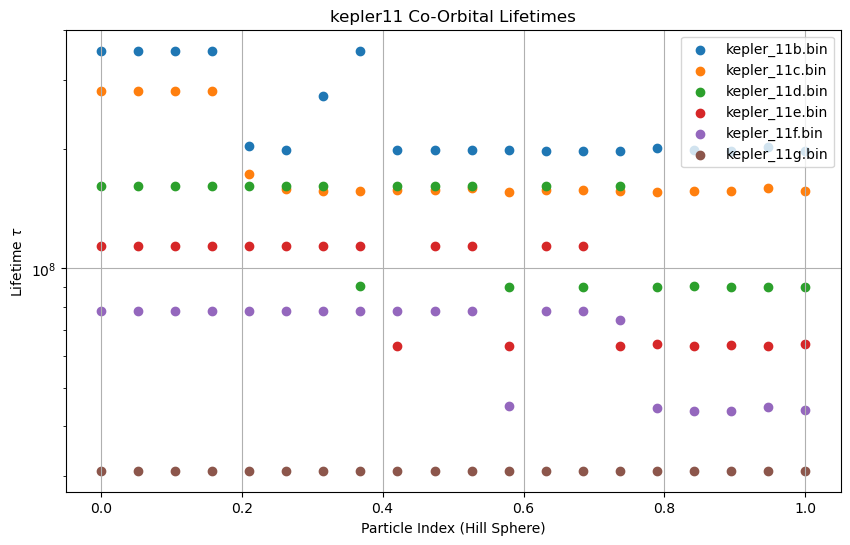

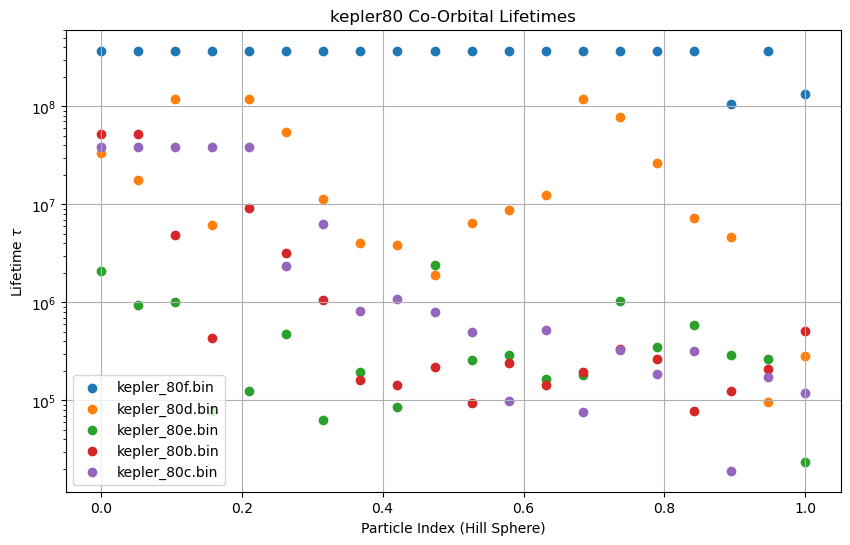

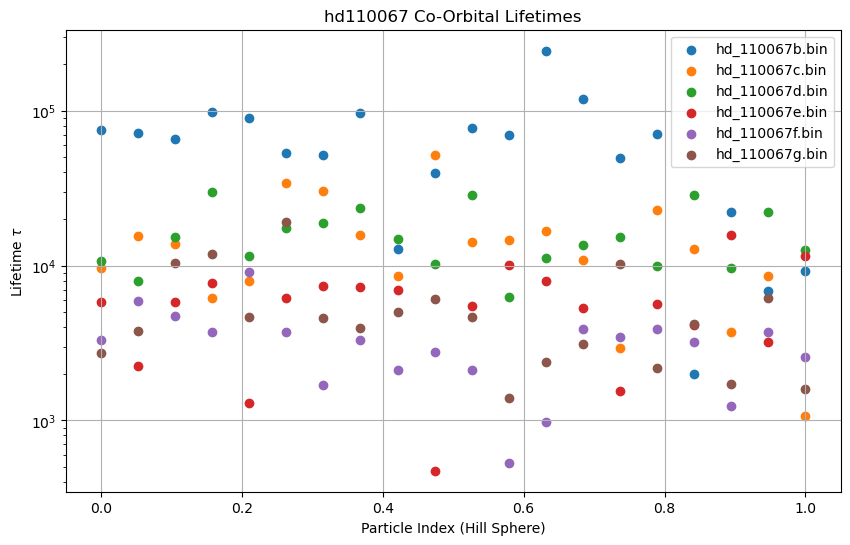

In [6]:
# filenames
systems = {
    "trappist1": ["trappist_1b.bin", "trappist_1c.bin", "trappist_1d.bin", "trappist_1e.bin", "trappist_1f.bin", "trappist_1g.bin", "trappist_1h.bin"],
    "kepler11": ["kepler_11b.bin", "kepler_11c.bin", "kepler_11d.bin", "kepler_11e.bin", "kepler_11f.bin", "kepler_11g.bin"],
    "kepler80": ["kepler_80f.bin", "kepler_80d.bin", "kepler_80e.bin", "kepler_80b.bin", "kepler_80c.bin"],
    "hd110067": ["hd_110067b.bin", "hd_110067c.bin", "hd_110067d.bin", "hd_110067e.bin", "hd_110067f.bin", "hd_110067g.bin"]
}

for system_name, filenames in systems.items():
    plt.figure(figsize=(10, 6))  # new figure for each system

    for index, filename in enumerate(filenames):
        sa = rebound.Simulationarchive(path + filename)

        tmax = sa.tmax
        tmin = sa.tmin
        nshots = len(sa)
        times = np.linspace(tmin, tmax, nshots)

        # initialize lists
        fractional_indices = []
        normalized_stability_times = []

        # load first snapshot to get initial properties
        sim = sa[0]
        star_mass = sim.particles[0].m
        N_active = sim.N_active
        N_total = sim.N

        # determine planet of interest based on index
        planet = sim.particles[index + 1]
        a_planet = planet.a

        # Hill radius (AU)
        hill_radius = (planet.m / (3 * star_mass))**(1/3)
        stability_threshold = 5 * hill_radius

        # orbital period of host planet
        planet_period = 2 * np.pi * np.sqrt(a_planet**3 / (star_mass))

        # track stability times for each coorbital
        for j in range(N_active, N_total):
            coorbital = sim.particles[j]

            # fractional index
            fractional_index = (j - N_active) / (N_total - N_active - 1)

            # track stability times
            stability_detected = False
            for k in range(nshots):
                sim = sa[k]
                planet_longitude = sim.particles[index + 1].l
                coorbital_longitude = sim.particles[j].l

                # difference in mean_lon
                difference = abs(coorbital_longitude - planet_longitude)
                difference = min(difference, 2*np.pi - difference)  # account for periodicity

                # check stability threshold
                if difference < stability_threshold:
                    stability_time = times[k]
                    normalized_tau = stability_time / planet_period
                    fractional_indices.append(fractional_index)
                    normalized_stability_times.append(normalized_tau)
                    stability_detected = True
                    break  # stop if instability is detected

            if not stability_detected:
                # assume stability till the end
                normalized_tau = tmax / planet_period
                fractional_indices.append(fractional_index)
                normalized_stability_times.append(normalized_tau)

        # extract results for plotting
        if normalized_stability_times and fractional_indices:
            plt.scatter(fractional_indices, normalized_stability_times, label=filename)

    plt.xlabel('Particle Index (Hill Sphere)')  
    plt.ylabel(r'Lifetime $\tau$')  
    plt.title(f'{system_name} Co-Orbital Lifetimes')  
    plt.yscale('log')  
    plt.grid(True)
    plt.legend()
    plt.savefig(f'{system_name}_lifetime_long.png')
    plt.show()

#### kepler-90 sims

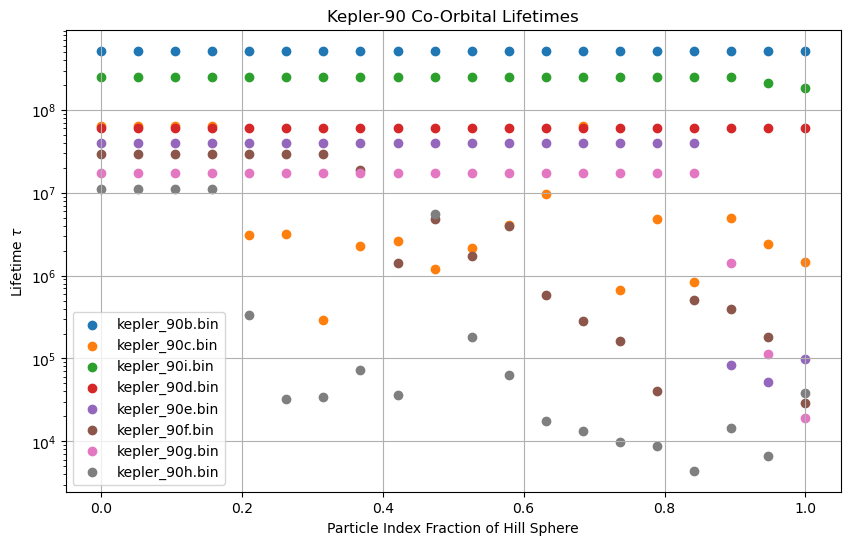

In [7]:
# Filenames for the Kepler-90 system
kepler90_filenames = ["kepler_90b.bin", "kepler_90c.bin", "kepler_90i.bin", "kepler_90d.bin", "kepler_90e.bin", "kepler_90f.bin", "kepler_90g.bin", "kepler_90h.bin"]

plt.figure(figsize=(10, 6))  # Create a new figure for the Kepler-90 system

# Process each file in the Kepler-90 system
for filename in kepler90_filenames:
    # Load the simulation archive
    sa = rebound.Simulationarchive(path + filename)

    # Get the time range and number of snapshots
    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)
    times = np.linspace(tmin, tmax, nshots)

    # Initialize lists for the system
    fractional_indices = []
    normalized_stability_times = []

    # Load the first snapshot to get initial properties of the system
    sim = sa[0]
    star_mass = sim.particles[0].m
    N_active = sim.N_active
    N_total = sim.N

    # Determine the planet of interest and its coorbitals based on the filename
    if "kepler_90b" in filename:
        planet_index = 1
        coorbital_start_index = 2
    elif "kepler_90c" in filename:
        planet_index = 2
        coorbital_start_index = 3
    elif "kepler_90i" in filename:
        planet_index = 3
        coorbital_start_index = 4
    elif "kepler_90d" in filename:
        planet_index = 4
        coorbital_start_index = 5
    elif "kepler_90e" in filename:
        planet_index = 5
        coorbital_start_index = 6
    elif "kepler_90f" in filename:
        planet_index = 6
        coorbital_start_index = 7
    elif "kepler_90g" in filename:
        planet_index = 7
        coorbital_start_index = 8
    elif "kepler_90h" in filename:
        planet_index = 8
        coorbital_start_index = 9

    planet = sim.particles[planet_index]
    a_planet = planet.a

    # Calculate Hill radius in AU
    hill_radius = (planet.m / (3 * star_mass))**(1/3)
    stability_threshold = 5 * hill_radius

    # Calculate the orbital period of the host planet
    planet_period = 2 * np.pi * np.sqrt(a_planet**3 / (star_mass))

    # Track stability times for each coorbital
    for j in range(coorbital_start_index, coorbital_start_index + 20):
        coorbital = sim.particles[j]

        # Compute the fractional index for the particle
        fractional_index = (j - coorbital_start_index) / 19

        # Track stability times
        stability_detected = False
        for k in range(nshots):
            sim = sa[k]
            planet_longitude = sim.particles[planet_index].l
            coorbital_longitude = sim.particles[j].l

            # Compute the difference as coorbital minus planet
            difference = abs(coorbital_longitude - planet_longitude)
            difference = min(difference, 2*np.pi - difference)  # Account for periodicity

            # Check if the difference is below the stability threshold
            if difference < stability_threshold:
                stability_time = times[k]
                normalized_tau = stability_time / planet_period
                fractional_indices.append(fractional_index)
                normalized_stability_times.append(normalized_tau)
                stability_detected = True
                break  # Stop if instability is detected

        if not stability_detected:
            # If no instability is detected, assume stability till the end
            normalized_tau = tmax / planet_period
            fractional_indices.append(fractional_index)
            normalized_stability_times.append(normalized_tau)

    # Extract results for plotting
    if normalized_stability_times and fractional_indices:
        # Plot the fractional index vs. normalized stability time (τ)
        plt.scatter(fractional_indices, normalized_stability_times, label=filename)

plt.xlabel('Particle Index Fraction of Hill Sphere')  # Updated x-axis label
plt.ylabel(r'Lifetime $\tau$')  # Updated y-axis label
plt.title('Kepler-90 Co-Orbital Lifetimes')  # Updated title
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.legend()
plt.savefig('kepler90_lifetime_long.png')
plt.show()